In [1]:
# Library 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image
import platform
import subprocess
import warnings
warnings.filterwarnings("ignore")

In [2]:
ds_path = 'E:\\MEGA\\VTCA\\AI_Specialist\\AI_Workspace\\3. Dataset\\'
if platform.system().lower() == 'linux':
    ds_path = '/mnt/e/MEGA/VTCA/AI_Specialist/AI_Workspace/3. Dataset/'

fold_name = 'AI Specialist Lesson 06'

path = ds_path + fold_name
os.chdir(ds_path)

if not os.path.isdir(path):
    import subprocess
    subprocess.run(["unrar", "x", f"{fold_name}.rar"])

os.chdir(path)

In [3]:
data = pd.read_csv('uci-secom.csv')
print(data.shape)
display(data.head())

(1567, 592)


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
data.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [5]:
anomalyValue = 0
data = data.fillna(anomalyValue)
data.isnull().any().any()

False

<AxesSubplot:>

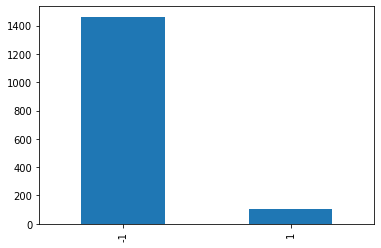

In [6]:
data['Pass/Fail'].value_counts().plot(kind='bar')

In [7]:
data = data.drop('Time', axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [8]:
np.random.seed(1)

In [9]:
target = "Pass/Fail"
target_idx = 590

In [10]:
data_os = data.copy()
X = data_os.iloc[:, :target_idx]
y = data_os.iloc[:, target_idx]
print(X.shape, y.shape)

(1567, 590) (1567,)


In [11]:
y.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

## Oversampling before split train/test set

In [12]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE(random_state=1)
X_os, y_os = oversampling.fit_resample(X, y.values)

print(X_os.shape, y_os.shape)
print(pd.DataFrame(y_os).value_counts())

(2926, 590) (2926,)
-1    1463
 1    1463
dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size=0.2, random_state=1)

print(X_train_os.shape)
print(X_test_os.shape)
print(y_train_os.shape)
print(y_test_os.shape)

(2340, 590)
(586, 590)
(2340,)
(586,)


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline

sc = StandardScaler()
pca = PCA(n_components=150, random_state=1)
xgbc = XGBClassifier(eval_metric='logloss')

model_pipeline = Pipeline([
    ('sc', sc),
    ('pca', pca),
    ('xgbc', xgbc)
])

model_pipeline.fit(X_train_os, y_train_os)


Pipeline(steps=[('sc', StandardScaler()),
                ('pca', PCA(n_components=150, random_state=1)),
                ('xgbc',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', v

In [15]:
y_pred_os = model_pipeline.predict(X_test_os)

[[300   0]
 [  0 286]]


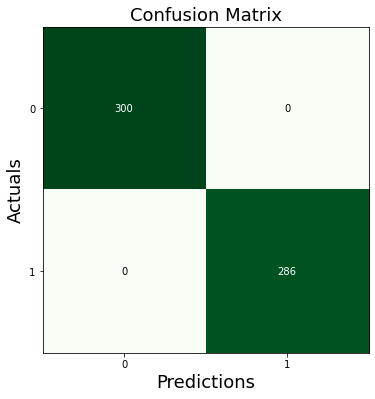

In [16]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_os, y_pred_os)
print(conf_matrix)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

[[1463    0]
 [   0  104]]


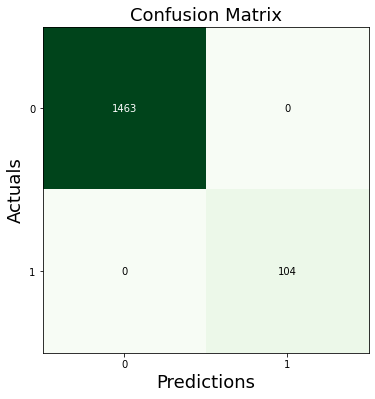

In [17]:
y_pred_1 = model_pipeline.predict(X)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y, y_pred_1)
print(conf_matrix)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Oversampling after train/test/ split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1253, 590)
(314, 590)
(1253,)
(314,)


In [20]:
y_train.value_counts()

-1    1169
 1      84
Name: Pass/Fail, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE(random_state=1)
X_train_os, y_train_os = oversampling.fit_resample(X_train, y_train)

print(X_train_os.shape, y_train_os.shape)
print(pd.DataFrame(y_train_os).value_counts())

(2338, 590) (2338,)
Pass/Fail
-1           1169
 1           1169
dtype: int64


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline

sc = StandardScaler()
pca = PCA(n_components=150, random_state=1)
xgbc = XGBClassifier(eval_metric='logloss')

model_pipeline = Pipeline([
    ('sc', sc),
    ('pca', pca),
    ('xgbc', xgbc)
])

model_pipeline.fit(X_train_os, y_train_os)

Pipeline(steps=[('sc', StandardScaler()),
                ('pca', PCA(n_components=150, random_state=1)),
                ('xgbc',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', v

[[294   0]
 [ 20   0]]


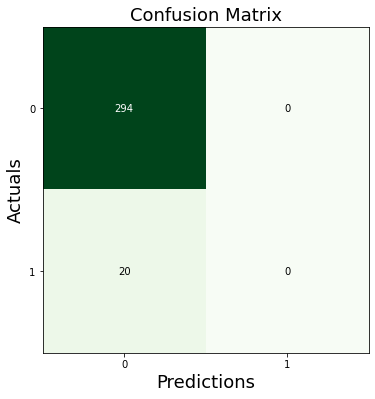

In [24]:
y_pred = model_pipeline.predict(X_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()